![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Ethan Helder
***

# Outline
#### -Business Problem
#### -Data Understanding
#### -Data Preperation
#### -Data Modeling
#### -Evaluation
#### -Conclusion

## Overview

    Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. Using data recieved from movie review websites I descibe trends in amount grossed compared to different varibles in order to accuartely descibe how to make money in the movie industry.


## Business Problem


***
Microsoft wants to get into the movie industry but doesnt know what to do in order to make money from it. I wanted to find out exactly what qualities allowed for a movie to make money so that I can approprietly advise what to do.
***

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

%matplotlib inline

## Data Understanding

***
I recieved this data from movie review sites such as IMDB. The data represents individual movies; how much they made, what ratings they got, what genre they are from, length of movie runtime.
***

Asigns data to individual dataframes. They are movie_gross, title_basics, and title_ratings.

In [2]:
movie_gross = pd.read_csv('''data/zippedData/bom.movie_gross.csv.gz''')
title_basics = pd.read_csv('''data/zippedData/imdb.title.basics.csv.gz''')
title_ratings = pd.read_csv('''data/zippedData/imdb.title.ratings.csv.gz''')

## Data Preparation

***
I removed the outliers and missing values while totaling the amount grossed for each movie. Doing so allowed to correctly graph my findings and predict how a movie might perform.
***

Changes column name to properly merge title_basics with movie_gross. Drops unessecary column and merges titles_basics, title_ratings, and movie_gross. 

In [3]:
title_basics.rename(columns={'primary_title':'title'}, inplace=True)
title_basics.drop(columns='original_title', inplace=True) 
movies = pd.merge(movie_gross, title_basics)
movies = pd.merge(movies, title_ratings)

Drops duplicate titles and replaces missing values in foreign_gross with 0

In [ ]:
movies.drop_duplicates('title', inplace=True)
movies['foreign_gross'].fillna(0, inplace=True)

Cleans up any number in the column foreign_gross that has commas in it

In [ ]:
movies.foreign_gross = movies.foreign_gross.astype(str)
movies.foreign_gross = movies.foreign_gross.map(lambda x : x.replace(',', ''))
movies.foreign_gross = movies.foreign_gross.astype(float)

Adds domestic_gross and foreign_gross to have a total_gross. Then drops any NA values left in movies

In [ ]:
movies['total_gross'] = movies['domestic_gross'] + movies['foreign_gross']
movies.dropna(inplace=True)

Asigns which movies will be dropped and merges title_ratings and title_basics to form titles

In [4]:
bad_movies = movies[movies['total_gross']<100000000]
titles = pd.merge(title_ratings, title_basics, on='tconst')

Creates a dictionary that counts how many movies are in each genre and then sorts it.

In [ ]:
dic = {}
for genre in titles.genres.unique():
    dic[genre] = 0
for genre in titles.genres:
    for key in dic:
        if key == genre:
            dic[key] += 1
sorted_dic = sorted(dic.items(), key=lambda x: x[1], reverse = True)

Isolates which genres have less than 10 movies

In [ ]:
bad_genres = []
for k in dic:
    if dic[k] < 10:
        bad_genres.append(k)

Isolates every genre but those that have over 500 movies 

In [ ]:
all_but_good_genres = []
for k in dic:
    if dic[k] < 500:
        all_but_good_genres.append(k)

Iterates though sorted_dic to only pull out genres with 10 or more movies

In [ ]:
new_dic = {}
for k, v in sorted_dic:
    if v >= 10:
        new_dic[k] = v

Iterates through new_dic to asign numerical value to each genre for titles_genre_dic

In [9]:
count = 0
titles_genre_dic = {}
for k in new_dic:
    count += 1
    titles_genre_dic[k] = count

Iterates through new_dic to asign numerical value to each genre for movie_genre_dic

In [8]:
count = 0
movie_genre_dic = {}
for k in new_dic:
    count += 1
    movie_genre_dic[k] = count

***
* Drops duplicate titles
* Drops genres that have less than 10 movies and asigns to cleaned_titles
* Drops genres that have less than 500 movies and asigns to good_genre_titles
***

In [ ]:
titles.drop_duplicates(inplace=True)
cleaned_titles = titles.set_index('genres').drop(bad_genres).reset_index()
cleaned_titles['genres_num'] = cleaned_titles['genres']
good_genre_titles = titles.set_index('genres').drop(all_but_good_genres).reset_index()
good_genre_titles['genres_num'] = good_genre_titles.genres

Asigns a numerical value to each genre in order to more easily graph

In [15]:
for k in titles_genre_dic: 
    for i in list(range(0, len(cleaned_titles.genres_num))):
        if cleaned_titles.genres_num[i] == k:
            cleaned_titles.genres_num[i] = titles_genre_dic[k]
for k in movie_genre_dic:
    for i in list(range(0, len(good_genre_titles.genres_num))):
        if good_genre_titles.genres_num[i] == k:
            good_genre_titles.genres_num[i] = movie_genre_dic[k]

<ipython-input-15-a4ec2691501d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_titles.genres_num[i] = titles_genre_dic[k]
<ipython-input-15-a4ec2691501d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_genre_titles.genres_num[i] = movie_genre_dic[k]


## Data Modeling
Describe and justify the process for analyzing or modeling the data.
***
* I broke the data down to amount grossed vs average rating to find that there is a positive correlation. Then found which genres had the highest rating as well as which genres were most frequently made.
* I removed all the movies that didn't make a lot of money. I started with 100,000 and quickly raised it to only movies that made over 100,000,000. I did this to more appropriatly visualize the data.
***

Found that on average, the higher rating a movie recieves the more money it makes.

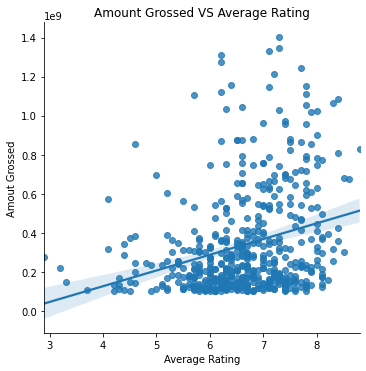

In [54]:
sns.lmplot(x='averagerating', y='total_gross', data=movies.drop(bad_movies.index))\
.set(xlabel='Average Rating', ylabel='Amout Grossed', title='Amount Grossed VS Average Rating')
plt.savefig('images/Total_grossed_vs_Average_Rating.png',dpi=300, bbox_inches = "tight")
plt.show()

Found that the four genres that have the highest average rating are Documentary or a subcategory of Documentary. Also to note is that Horror and the two subcategories have the lowest three average ratings.

In [46]:
to_drop = ['numvotes', 'start_year', 'runtime_minutes']
good_genre_titles.groupby('genres').mean().reset_index()\
.sort_values('averagerating', ascending=False).drop(to_drop, axis=1)

,genres,averagerating
11,"Documentary,Music",7.478756
10,"Documentary,Drama",7.332818
9,Documentary,7.293794
2,"Biography,Documentary",7.221758
12,Drama,6.494265
4,"Comedy,Drama",6.364119
13,"Drama,Romance",6.294305
5,"Comedy,Drama,Romance",6.292467
8,"Crime,Drama,Thriller",6.128968
14,"Drama,Thriller",6.118485


Found that Dramas and Documentaries are significantly more frequent than the rest of the genres.

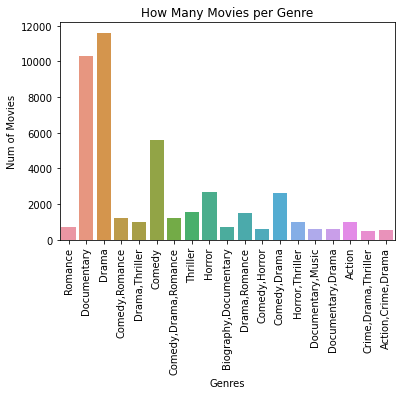

In [52]:
sns.countplot(x='genres', data=good_genre_titles)\
.set(xlabel='Genres', ylabel='Num of Movies', title='How Many Movies per Genre')
plt.xticks(rotation=90);
plt.savefig('images/Num_movies_per_genre.png',dpi=300, bbox_inches = "tight")
plt.show()

Visulization to better see the distribution of genres by average rating.

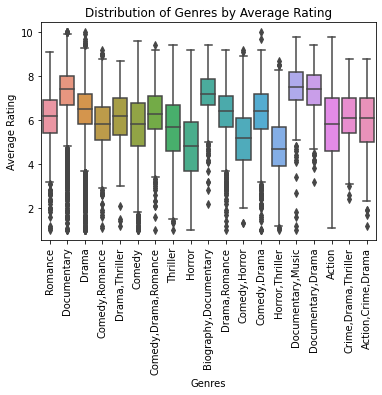

In [50]:
sns.boxplot(x="genres", y="averagerating", data=good_genre_titles)\
.set(xlabel='Genres', ylabel='Average Rating', title='Distribution of Genres by Average Rating')
plt.xticks(rotation=90);
plt.savefig('images/average_ratings_per_genre.png',dpi=300, bbox_inches = "tight")
plt.show()

Merged good_genre_titles and movies so I only have 19 genres to evaluate total_grossed
* Note: This does shrink the amount of data by a significant margin

In [29]:
good_genre_movies = pd.merge(movies, good_genre_titles)
meanByGenre = good_genre_movies.groupby(['genres']).mean()
grouped = meanByGenre.reset_index().sort_values('total_gross', ascending=False)

Found that even though Horrors receive the lowest average rating, they remain an outlier as the highest grossing genre on average.

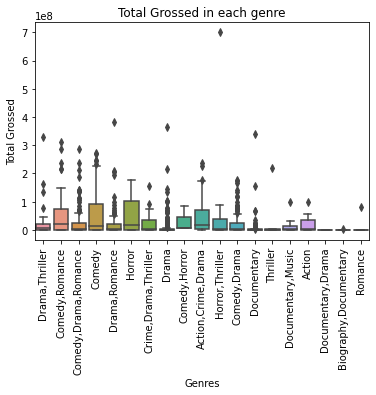

In [49]:
sns.boxplot(x="genres", y="total_gross", data=good_genre_movies)\
.set(xlabel='Genres', ylabel='Total Grossed', title='Total Grossed in each genre')
plt.xticks(rotation=90);
plt.savefig('images/total_grossed_per_genre.png',dpi=300, bbox_inches = "tight")
plt.show()

Table to more easily interpret the data

In [41]:
to_drop = ['domestic_gross', 'foreign_gross', 'year', 'start_year', 'runtime_minutes', 'numvotes']
grouped.drop(to_drop, axis=1)

,genres,averagerating,total_gross
15,Horror,5.269231,5.671794e+07
3,Comedy,5.762338,5.657047e+07
7,"Comedy,Romance",6.037500,5.020703e+07
1,"Action,Crime,Drama",6.672093,4.827720e+07
16,"Horror,Thriller",5.340909,4.821455e+07
6,"Comedy,Horror",5.600000,3.265900e+07
5,"Comedy,Drama,Romance",6.345161,2.575589e+07
18,Thriller,5.477778,2.522393e+07
14,"Drama,Thriller",6.445455,2.495701e+07
8,"Crime,Drama,Thriller",6.688889,2.422652e+07


## Results

***
* On average, the higher rating a movie gets the more money it makes. 
* I have found that Documentaries recieve the highest ratings on average.
* Dramas and Documentaries are the most frequent genres by a significant margin.
* Horror movies stand out due to it recieving the lowest average ratings but still making the most money.
***

## Conclusions

***
* Microsoft should enter the movie industry with a Documentary or Horror film. 
* Documentaries are the second most frequent genre and the highest average rating. Due to the fact that on average the higher rating a movie receives the more money it makes, Documentaries would be a perfect starting block to enter the movie industry. 
* Horrors stand out because even though they do receive a very low average rating they also has the highest average total grossed.
* There are many more factors that go into a money making movie such as which actors and/or directors help the movie make the most money. In order to more accurately predict one would have to answer such questions.
***